In [1]:
ZERO = 0.1

def decayNumerical (numInit, decayConst, timeStep):
    """
    Description: Calculates the numerical approximation of an exponential decay process based upon the given parameters

    Parameters: numInit - initial amount of the substance
                decayConst - decay constant specific to the substance
                timeStep - amount of time passing between samples

    returned: amount left at each timeStep intervals and the time values at each timeStep interval
    """
    
    amountLeft = []
    timeValues = []
    numLeft = numInit
    time = 0

    #calculates the number remaining until the amount has leveled below the tolerance amount
    while (numLeft > ZERO):
        #adds values to the amount left and the time values
        amountLeft.append (numLeft)
        timeValues.append (time)
        
        #decrements the amount left based upon the decay rate and Euler method 
        numLeft -= numLeft * decayConst * timeStep
        time += timeStep
    
    return amountLeft, timeValues

        

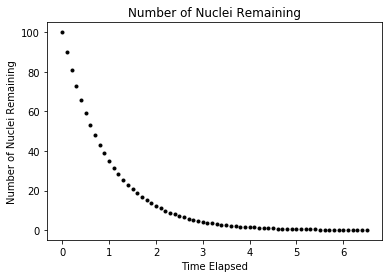

In [2]:
import pylab as plt
import numpy as np

%matplotlib inline

#situational values we are testing
numNuclei = 100
decayConst = 1
timeStep = 0.1

#graph labels
pltTitle = "Number of Nuclei Remaining"
pltXLabel = "Time Elapsed"
pltYLabel = "Number of Nuclei Remaining"

#calculate the lists of values based upon variables we are testing
numNumerical, timeValues = decayNumerical (numNuclei, decayConst, timeStep)

#graphs the data
plt.plot ( timeValues, numNumerical,"k.")
plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)

plt.show ()

The graph above is a numerical solution to the differentiable equation $\frac{dN}{dt} = -\lambda N(t)$ using the Euler approximation. As a result of the solution being an approximation based upon small changes in time, increasing the time step decreases its accuracy. The exact solution to this differentiable equation is an exponential decay function. This situation models a situation that is random in specific decays but has an overall probability that an amount of the substance will decay in a given amount of time.

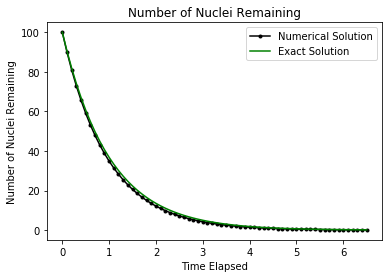

In [18]:
numExact = []

#calculates the remaining amount based upon the exact solution to an exponential decay process
for t in timeValues:
    numExact.append (numNuclei * np.exp (-decayConst * t))

#plots the exact solution along side the approximation
plt.plot ( timeValues, numNumerical,"k.-", label="Numerical Solution")
plt.plot ( timeValues, numExact,"g-", label="Exact Solution")
plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)

plt.legend()
plt.show ()

The numerical and exact data sets are very similar. The numerical solution has resulted in data values that are often just below the exact solution, but are still very close. This case is a fairly nice example of how we can make an approximation for a situation that would normally take an infinite number of calculations to solve under normal circumstances. This helps to show how the exponential decay function is a good solution to the differential equation $\frac{dN}{dt} = -\lambda N(t)$.

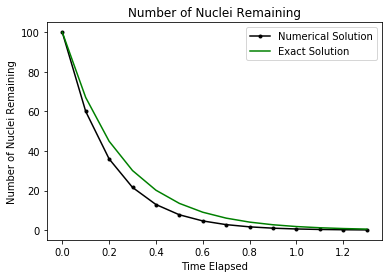

In [19]:
#sets the base values we will be testing
numNuclei2 = 100
decayConst2 = 4
timeStep2 = .1
numExact2 = []

#calculates the amount remaining and time values based upon the test variables defined above and the Euler approximation
numNumerical2, timeValues2 = decayNumerical (numNuclei2, decayConst2, timeStep2)

#calculates the exact amount remaining based upon an exponential decay
for t in timeValues2:
    numExact2.append (numNuclei2 * np.exp (-decayConst2 * t))

#plots the approximation alongside the exact solution
plt.plot ( timeValues2, numNumerical2,"k.-", label="Numerical Solution")
plt.plot ( timeValues2, numExact2,"g-", label="Exact Solution")
plt.xlabel (pltXLabel)
plt.ylabel (pltYLabel)
plt.title (pltTitle)

plt.legend()
plt.show ()

Playing with the decay constant, initial amount, and the time step I have noticed that increasing the time step and the decay constant decreases how similar the numerical solution is to the exact solution. Doing the opposite seemed to increase how similar the two solutions were. I did not see much of a difference between the two solutions when I changed the initial amounts. This would come about as a result of the numerical solution following from a limit, and thus looking at an infitesimal decrease in the time step.


In [20]:

def decayABNumerical (numInitialA, numInitialB, decayConstA, decayConstB, timeStep):
    """
    Description: Returns the numerical approximation of two decaying substances A and B where B is dependant upon A

    Parameters: numInitialA - initial amount of substance A
                numInitialB - initial amount of substance B
                decayConstA - decay constant of substance A
                decayConstB - decay constant of substance B
                timeStep - amount of time between each substance amount calculation

    returned: lists having the number of A and number of B remaining at each time step until substance A falls below the the threshold
                limit value, and the list that has the times when each sample amount is recorded
    """
    
    amountBLeft = []
    amountALeft = []
    timeValues = []
    numALeft = numInitialA
    numBLeft = numInitialB
    time = 0
    
    #continues calculating amount of each substance until the amount of A falls below the threshold value
    while (numALeft > ZERO):
        #add the values to the lists for the specific time
        amountBLeft.append (numBLeft)
        amountALeft.append (numALeft)
        timeValues.append (time)
        
        #calculate the amount of substance A remaining based upon the current amount of A and the time since last calculation
        numALeft += timeStep * -decayConstA * numALeft
        
        #calculate the amount of substance B remaining based upon the current amount of B, the time since the last calculation,
        #and the amount of substance A that was converted to substance B
        numBLeft += timeStep * (decayConstA * numALeft - decayConstB * numBLeft)
        
        #increment the amount of time that has elapsed
        time += timeStep
        
    return amountALeft, amountBLeft, timeValues
    

In [21]:

def printABChange (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB):
    """
    Description: prints a plot of the numerical solution to two decaying substance A and B where B is dependant on A

    Parameters: numInitialA - initial amount of substance A
                numInitialB - initial amount of substance B
                decayConstA - decay constant of substance A
                decayConstB - decay constant of substance B
                timeStep - amount of time between each substance amount calculation

    returned: none
    """

    #calculates the amount of A and B remaining at each time interval
    numA, numB, timeValuesAB = decayABNumerical (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB)

    #plots the data
    plt.plot ( timeValuesAB, numA,"k.", label="A Decay")
    plt.plot ( timeValuesAB, numB,"g.", label="B Decay")
    plt.xlabel (pltXLabel)
    plt.ylabel (pltYLabel)
    plt.title (pltTitle)

    plt.legend()
    plt.show ()

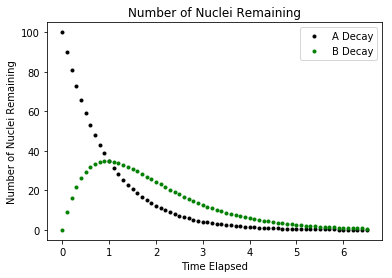

In [22]:
#values to test plotting
numInitialA = 100
numInitialB = 0
decayConstA = 1
decayConstB = 1
timeStepAB = 0.1

#plot test value
printABChange (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB)

This is one of the coolest graphs I think we have had in physics. The A decay works the same as a normal exponential decay, while the B decay is dependant upon the A decay. Since A decays at an exponential rate B can actually have a positive rate of change during the first part of the graph (during the time before around 1), while it has a negative rate of change after less A nuclei are being converted to B then the B nuclei are being changed.

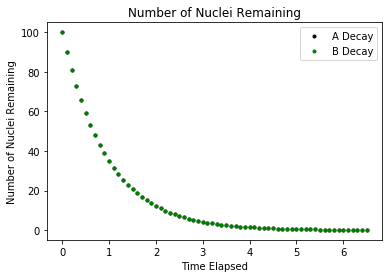

In [23]:
#test values to plot
numInitialA = 100
numInitialB = 100
decayConstA = 1
decayConstB = 1.9
timeStepAB = 0.1

#plot test values
printABChange (numInitialA, numInitialB, decayConstA, decayConstB, timeStepAB)

This is a fairly interesting ratio of $\frac{\lambda_A}{\lambda_B}$. As a result the two samples have around the same number of nuclei at each time. I originally tried a ratio 0f 2:1 for B:A but found this ratio resulted in more similar values from the two samples. 

#### Exact Solution

$N_B(t) = \big ( \frac{\lambda_A N_{A_o}}{\lambda_B - \lambda_A} \big ) e^{-\lambda_A t} + \big ( N_{B_o} - \frac{\lambda_A N_{A_o}}{\lambda_B - \lambda_A} \big ) e^{-\lambda_B t}$